In [1]:
#import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.coordinates import SkyCoord
import matplotlib as mpl
#matplotlib defaults
mpl.rcParams['grid.color'] = 'k'
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['grid.linewidth'] = 0.5
mpl.rcParams['axes.linewidth'] = 1.0
mpl.rcParams['figure.figsize'] = [8.0, 6.0]
mpl.rcParams['figure.dpi'] = 80
mpl.rcParams['savefig.dpi'] = 100
mpl.rcParams['font.size'] = 18
mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['figure.titlesize'] = 'large'
mpl.rcParams['xtick.bottom']=True
mpl.rcParams['xtick.top']=True
mpl.rcParams['xtick.major.width']=0.9
mpl.rcParams['xtick.minor.width']=0.9
mpl.rcParams['ytick.major.width']=0.9
mpl.rcParams['ytick.minor.width']=0.9
mpl.rcParams['ytick.right']=True
mpl.rcParams['ytick.left']=True
mpl.rcParams['xtick.direction']='in'
mpl.rcParams['ytick.direction']='in'

mpl.rcParams['font.serif'] = 'Ubuntu'
#mpl.rcParams['font.monospace'] = 'Ubuntu Mono'
mpl.rcParams["mathtext.fontset"] = "dejavuserif"

mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['xtick.labelsize'] = 18
mpl.rcParams['ytick.labelsize'] = 18
mpl.rcParams['legend.fontsize'] = 18
mpl.rcParams['figure.titlesize'] = 18

%matplotlib inline


In [2]:
import lightkurve as lk
lightcurve = lk.search_lightcurve("246.0684208 -32.2037824", mission="TESS").download_all()


ModuleNotFoundError: No module named 'lightkurve'

In [3]:
#proxima b
#prox=SkyCoord("14:29:42.94853 -62:40:46.1631",  unit=(u.hourangle, u.deg))

In [4]:
##SkyCoord?

In [5]:
#lightcurve = lk.search_lightcurve(prox, mission="TESS").download_all()


In [6]:
#fig, ax=plt.subplots(figsize=(14, 2))
#plt.plot(lightcurve.data[-1]['time'].value, lightcurve.data[-1]['flux'].value)

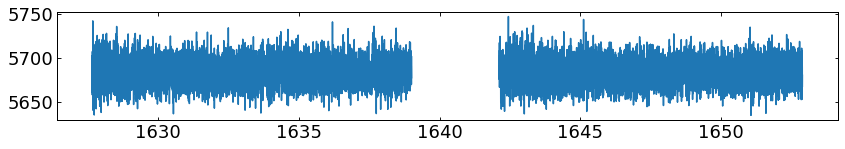

In [7]:
fig, ax=plt.subplots(figsize=(14, 2))
plt.plot(lightcurve.data[0]['time'].value, lightcurve.data[0]['flux'].value)

In [8]:
#np.random.shuffle?

In [9]:
lightcurve[-1].flux=lightcurve[-1].flux.value*u.electron/u.s
lightcurve[-1].flux_err=lightcurve[-1].flux_err.value*u.electron/u.s
lightcurve[0].flux=lightcurve[0].flux.value*u.electron/u.s
lightcurve[0].flux_err=lightcurve[0].flux_err.value*u.electron/u.s

In [10]:
#lightcurve[-1]

In [11]:
from lightkurve.correctors import CBVCorrector
cbvCorrector = CBVCorrector(lightcurve[0])

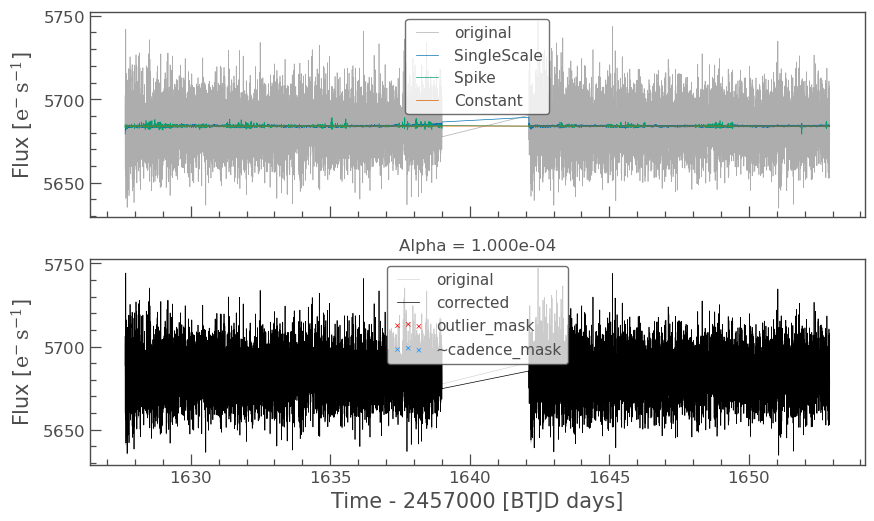

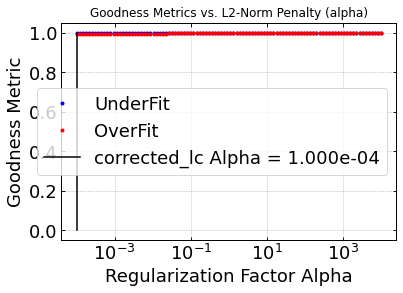

In [12]:
cbv_type = ['SingleScale', 'Spike']
# Select which CBV indices to use
# Use the first 8 SingleScale and all Spike CBVS
cbv_indices = [np.arange(1,9), 'ALL']
# Perform the correction
cbvCorrector.correct_gaussian_prior(cbv_type=cbv_type, cbv_indices=cbv_indices, alpha=1e-4)
cbvCorrector.diagnose();
cbvCorrector.goodness_metric_scan_plot(cbv_type=cbv_type, cbv_indices=cbv_indices);

In [85]:
#t=cbvCorrector.corrected_lc['time'].value
#flx=cbvCorrector.corrected_lc['flux'].value
#dflx=cbvCorrector.corrected_lc['flux_err'].value

#shuffle the data


In [87]:
#5

In [52]:
np.random.shuffle?

In [15]:
#flx= np.cos(5*t+5).flatten()
#dflx=np.random.choice(flx/10, len(flx) ).flatten()

In [89]:
len(flx), len(t)

(19104, 19104)

<ErrorbarContainer object of 3 artists>

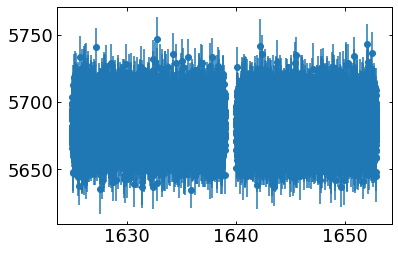

In [90]:
fig, ax=plt.subplots()
ax.errorbar(t, flx, yerr=dflx, fmt='o')

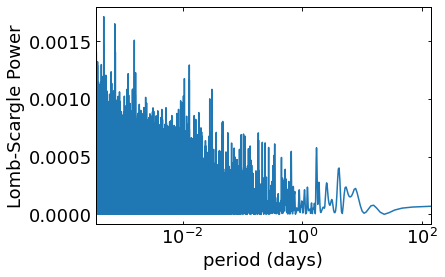

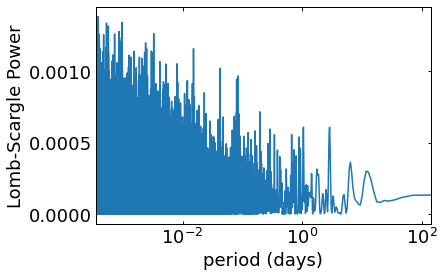

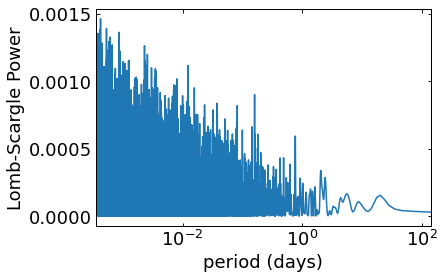

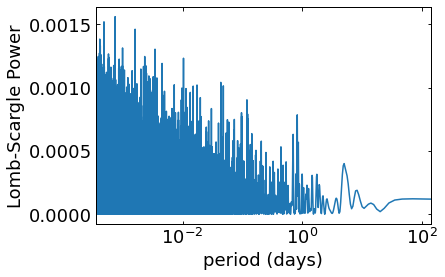

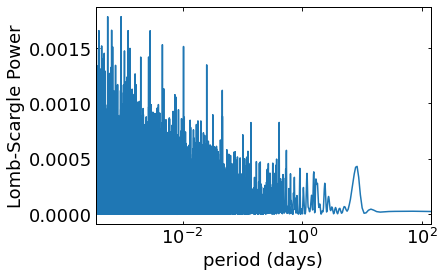

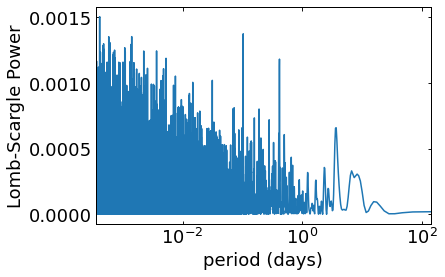

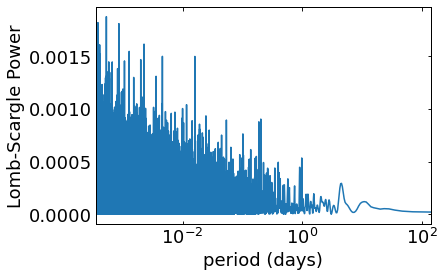

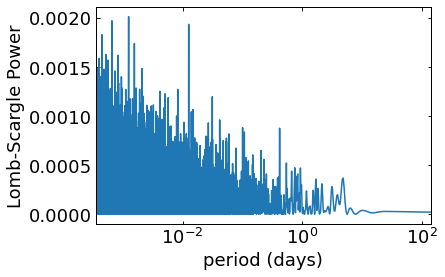

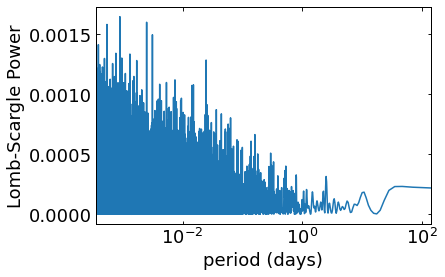

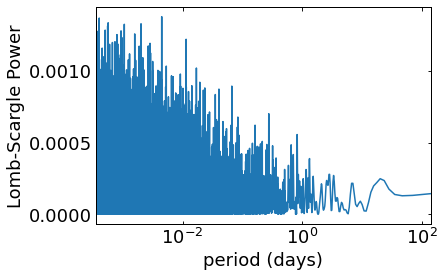

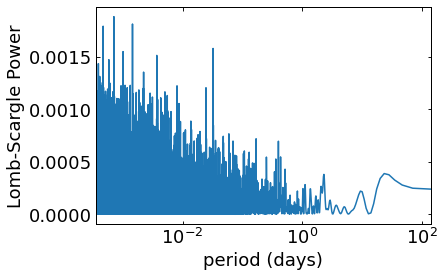

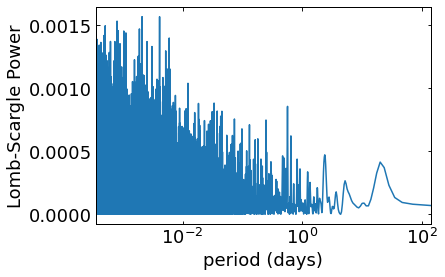

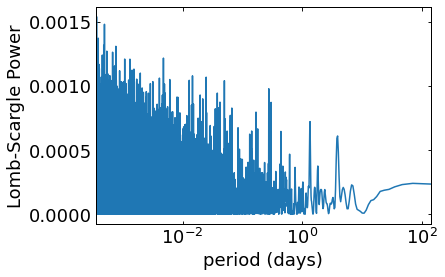

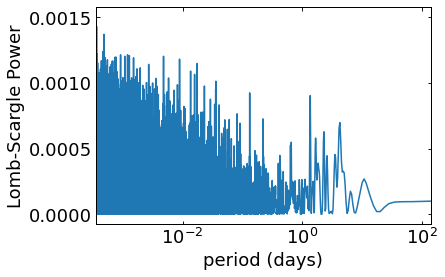

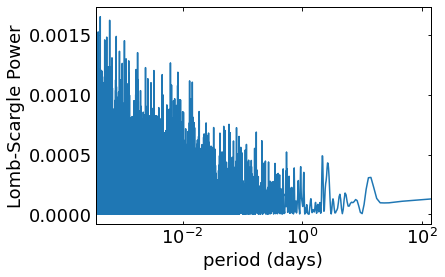

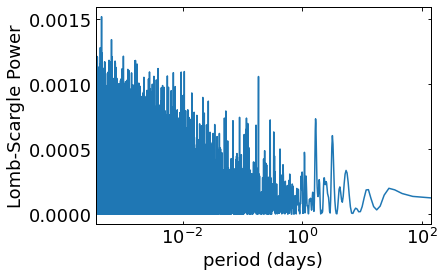

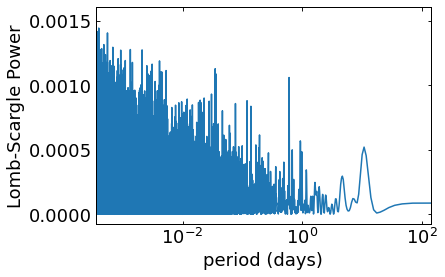

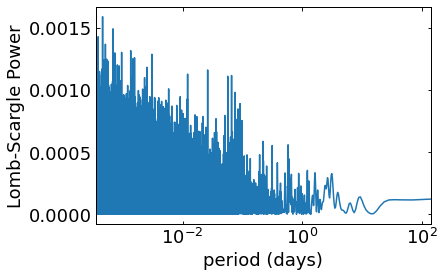

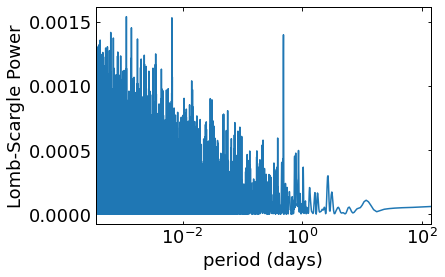

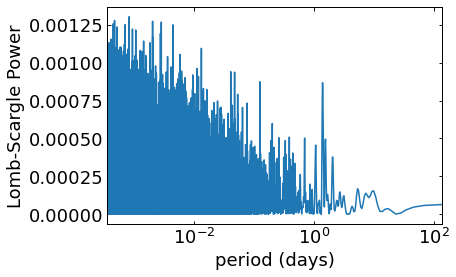

In [100]:
#lombscale from jakevdp blog
# Perform the correction
from gatspy.periodic import LombScargleFast

#tx=lightcurve.data[0]['time'].value.flatten()
for idx in np.arange(20):
    t=lightcurve.data[0]['time'].value.flatten()
    np.random.shuffle(t)
    flx=lightcurve.data[0]['flux'].value.flatten()
    dflx=lightcurve.data[0]['flux_err'].value.flatten()
    nans=np.isnan(flx)

    model = LombScargleFast().fit(t[~nans], flx[~nans], dflx[~nans])
    periods, power = model.periodogram_auto(nyquist_factor=10)

    fig, ax = plt.subplots()
    ax.plot(periods, power)
    ax.set(xlim=(periods.min(), periods.max()),
           xlabel='period (days)',
           ylabel='Lomb-Scargle Power',
           xscale='log')


In [95]:
 np.ptp(t)*0.99

27.656593672871022

In [101]:
# set range and find period
model.optimizer.period_range=(1e-2, 1e1)
period = model.best_period
print("period = {0}".format(period))



Finding optimal frequency:
 - Estimated peak width = 0.225
 - Using 5 steps per peak; omega_step = 0.045
 - User-specified period range:  0.01 to 10
 - Computing periods at 13956 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 1000 steps
period = 0.01320579368612855


In [102]:
def phase_plot(x, y, period, y_unc = 0.0, **kwargs):
    '''Create phase-folded plot of input data x, y
    
    Parameters
    ----------
    x : array-like
        data values along abscissa

    y : array-like
        data values along ordinate

    period : float
        period to fold the data
        
    y_unc : array-like
        uncertainty of the 
    '''    
    phases = (x/period) % 1
    if type(y_unc) == float:
        y_unc = np.zeros_like(x)
        
    plot_order = np.argsort(phases)
    ax=kwargs.get('ax', plt.gca())
    ax.errorbar(phases[plot_order], y[plot_order], y_unc[plot_order],
                 fmt='o', mec="0.2", mew=0.1, alpha=kwargs.get('alpha', 0.5))
    ax.set_xlabel("phase")
    ax.set_ylabel("signal")
    fig.tight_layout()

In [103]:
from astropy.stats import LombScargle

In [104]:
phase_fit = np.linspace(0, 1, 1000)
mag_fit = model.predict(phase_fit)
#frequency, power = LombScargle(t, flx, dflx).autopower()

In [32]:
np.isnan(mag_fit).all() 

False

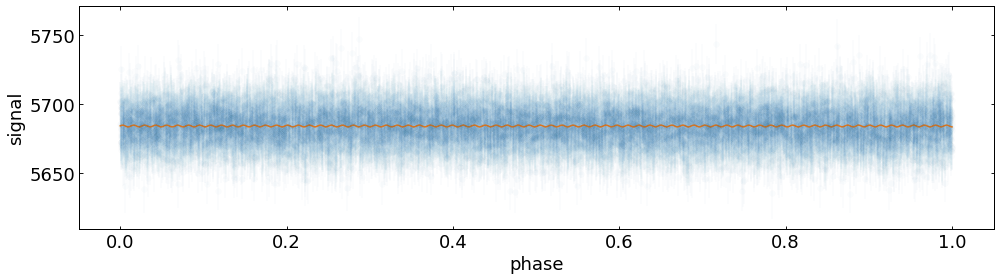

In [105]:
fig, ax=plt.subplots(figsize=(14, 4))
phase_plot(t[~nans], flx[~nans], period, y_unc = dflx[~nans], ax=ax, alpha=0.02)
#phase_plot(phase_fit, mag_fit, period, ax=ax)#
ax.plot(phase_fit, mag_fit)
#ax.set( ylim=[5683.25, 5684.75])

In [107]:
period*u.day.to(u.hour)

0.3169390484670852

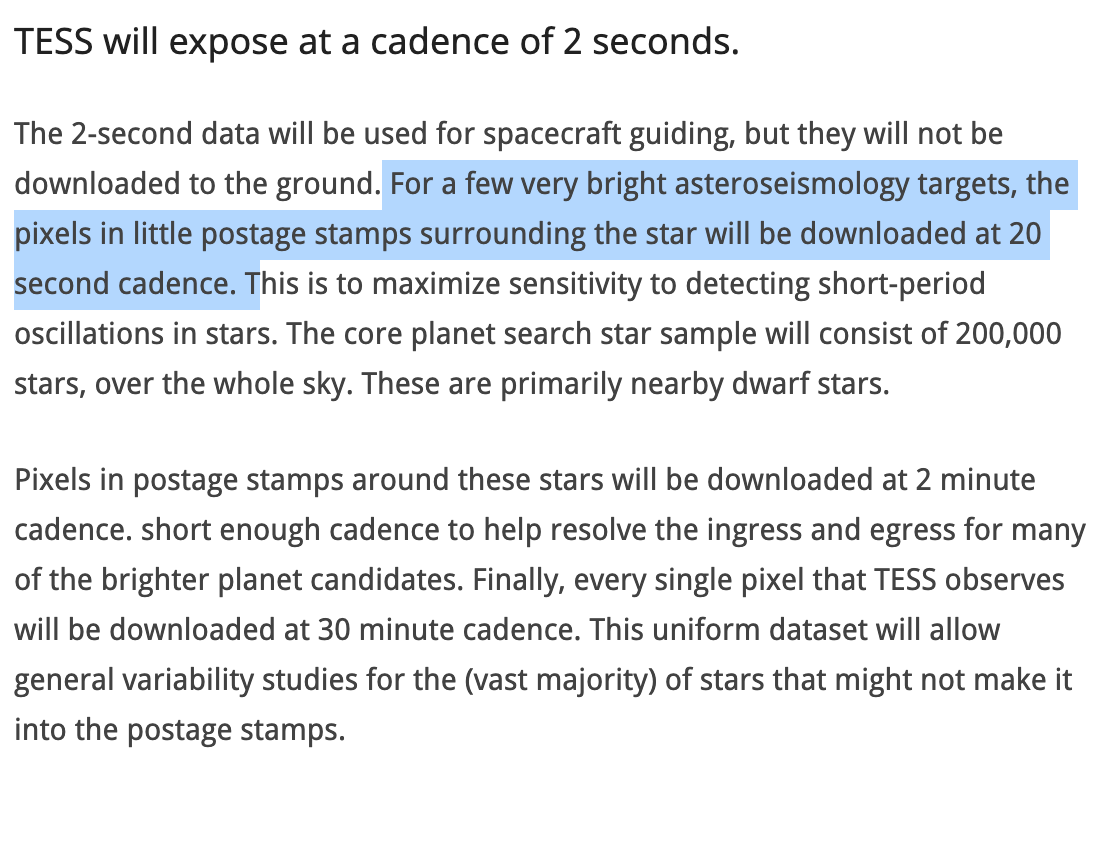